In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import os
import collections
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report,accuracy_score,f1_score,hamming_loss,confusion_matrix,roc_auc_score
import warnings
warnings.filterwarnings('ignore')
!pip3 install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# loading dataset
df=pd.read_csv('weather.csv')
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [3]:
dfa=pd.read_csv('rainfall in india 1901-2015.csv')
dfa.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [5]:
dfb=pd.read_csv('district wise rainfall normal.csv')
dfb.head()

,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN And NICOBAR ISLANDS,NICOBAR,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,354.8,326.0,315.2,250.9,2805.2,165.2,540.7,1207.2,892.1
1,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,455.6,301.2,275.8,128.3,3015.7,69.7,483.5,1757.2,705.3
2,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,454.8,276.1,198.6,100.0,2913.3,48.6,405.6,1884.4,574.7
3,ARUNACHAL PRADESH,LOHIT,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,313.6,167.1,34.1,29.8,3043.8,123.0,841.3,1848.5,231.0
4,ARUNACHAL PRADESH,EAST SIANG,33.3,79.5,105.9,216.5,323.0,738.3,990.9,711.2,568.0,206.9,29.5,31.7,4034.7,112.8,645.4,3008.4,268.1


In [6]:
df.shape

(366, 22)

In [7]:
dfa.shape

(4116, 19)

In [8]:
dfb.shape

(641, 19)

In [9]:
df.isnull().any()

MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation      False
Sunshine          True
WindGustDir       True
WindGustSpeed     True
WindDir9am        True
WindDir3pm        True
WindSpeed9am      True
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Cloud9am         False
Cloud3pm         False
Temp9am          False
Temp3pm          False
RainToday        False
RISK_MM          False
RainTomorrow     False
dtype: bool

In [10]:
df.isnull().sum()

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64

In [11]:
df['Sunshine'].fillna(df['Sunshine'].median(),inplace=True)
df['WindGustSpeed'].fillna(df['WindGustSpeed'].median(),inplace=True)
df['WindSpeed9am'].fillna(df['WindSpeed9am'].median(),inplace=True)
df['WindGustDir'].fillna(df['WindGustDir'].mode(),inplace=True)
df['WindDir9am'].fillna(df['WindDir9am'].mode(),inplace=True)
df['WindDir3pm'].fillna(df['WindDir3pm'].mode(),inplace=True)

In [12]:
df.isnull().any()

MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation      False
Sunshine         False
WindGustDir       True
WindGustSpeed    False
WindDir9am        True
WindDir3pm        True
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Cloud9am         False
Cloud3pm         False
Temp9am          False
Temp3pm          False
RainToday        False
RISK_MM          False
RainTomorrow     False
dtype: bool

In [13]:
df['WindGustDir'].fillna(df['WindGustDir'].mode(),inplace=True)
df['WindDir9am'].fillna(df['WindDir9am'].mode(),inplace=True)
df['WindDir3pm'].fillna(df['WindDir3pm'].mode(),inplace=True)
df.isnull().sum()

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          0
WindGustDir       3
WindGustSpeed     0
WindDir9am       31
WindDir3pm        1
WindSpeed9am      0
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64

In [14]:
dfa.isnull().any()

SUBDIVISION    False
YEAR           False
JAN             True
FEB             True
MAR             True
APR             True
MAY             True
JUN             True
JUL             True
AUG             True
SEP             True
OCT             True
NOV             True
DEC             True
ANNUAL          True
Jan-Feb         True
Mar-May         True
Jun-Sep         True
Oct-Dec         True
dtype: bool

In [15]:
dfa.isnull().sum()

SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
Jan-Feb         6
Mar-May         9
Jun-Sep        10
Oct-Dec        13
dtype: int64

In [16]:
dfa['JAN'].fillna(dfa['JAN'].median(),inplace=True)
dfa['FEB'].fillna(dfa['FEB'].median(),inplace=True)
dfa['MAR'].fillna(dfa['MAR'].median(),inplace=True)
dfa['APR'].fillna(dfa['APR'].median(),inplace=True)
dfa['MAY'].fillna(dfa['MAY'].median(),inplace=True)
dfa['JUN'].fillna(dfa['JUN'].median(),inplace=True)
dfa['JUL'].fillna(dfa['JUL'].median(),inplace=True)
dfa['AUG'].fillna(dfa['AUG'].median(),inplace=True)
dfa['SEP'].fillna(dfa['SEP'].median(),inplace=True)
dfa['OCT'].fillna(dfa['OCT'].median(),inplace=True)
dfa['DEC'].fillna(dfa['DEC'].median(),inplace=True)
dfa['NOV'].fillna(dfa['NOV'].median(),inplace=True)
dfa['Jan-Feb'].fillna(dfa['Jan-Feb'].median(),inplace=True)
dfa['Mar-May'].fillna(dfa['Mar-May'].median(),inplace=True)
dfa['Jun-Sep'].fillna(dfa['Jun-Sep'].median(),inplace=True)
dfa['ANNUAL'].fillna(dfa['ANNUAL'].median(),inplace=True)
dfa['Oct-Dec'].fillna(dfa['Oct-Dec'].median(),inplace=True)
dfa.isnull().sum()

SUBDIVISION    0
YEAR           0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
ANNUAL         0
Jan-Feb        0
Mar-May        0
Jun-Sep        0
Oct-Dec        0
dtype: int64

In [17]:
dfb.isnull().any()

STATE_UT_NAME    False
DISTRICT         False
JAN              False
FEB              False
MAR              False
APR              False
MAY              False
JUN              False
JUL              False
AUG              False
SEP              False
OCT              False
NOV              False
DEC              False
ANNUAL           False
Jan-Feb          False
Mar-May          False
Jun-Sep          False
Oct-Dec          False
dtype: bool

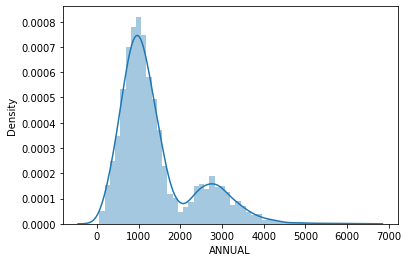

In [18]:
# univariate analysis.
sns.distplot(dfa.ANNUAL)

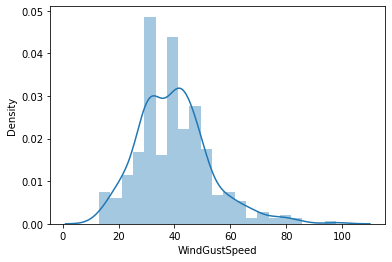

In [19]:
sns.distplot(df.WindGustSpeed)

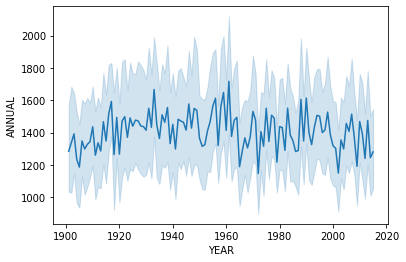

In [20]:
# bivariate analysis.
sns.lineplot(dfa.YEAR,dfa.ANNUAL)

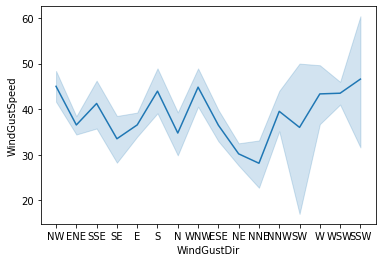

In [21]:
sns.lineplot(df.WindGustDir,df.WindGustSpeed)

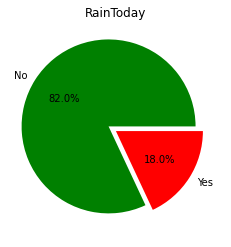

In [22]:
plt.pie(df.RainToday.value_counts(),[0.1,0],colors=['green','red'],labels=['No','Yes'],autopct="%1.1f%%")
plt.title('RainToday')
plt.show()

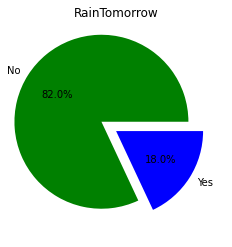

In [23]:
plt.pie(df.RainTomorrow.value_counts(),[0.2,0],colors=['green','blue'],labels=['No','Yes'],autopct="%1.1f%%")
plt.title('RainTomorrow')
plt.show()

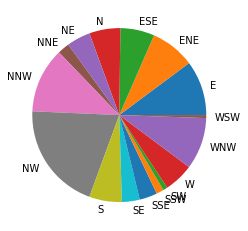

In [24]:
#pie chart
data1=df.groupby("WindGustDir",axis=0)
plt.pie(data1.count()["RainToday"], labels=data1.indices) 
plt.show()

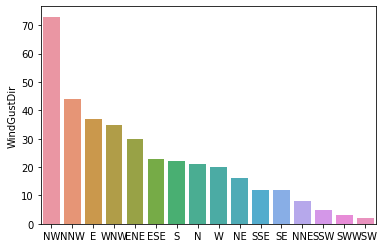

In [25]:
sns.barplot(df.WindGustDir.value_counts().index, df.WindGustDir.value_counts())

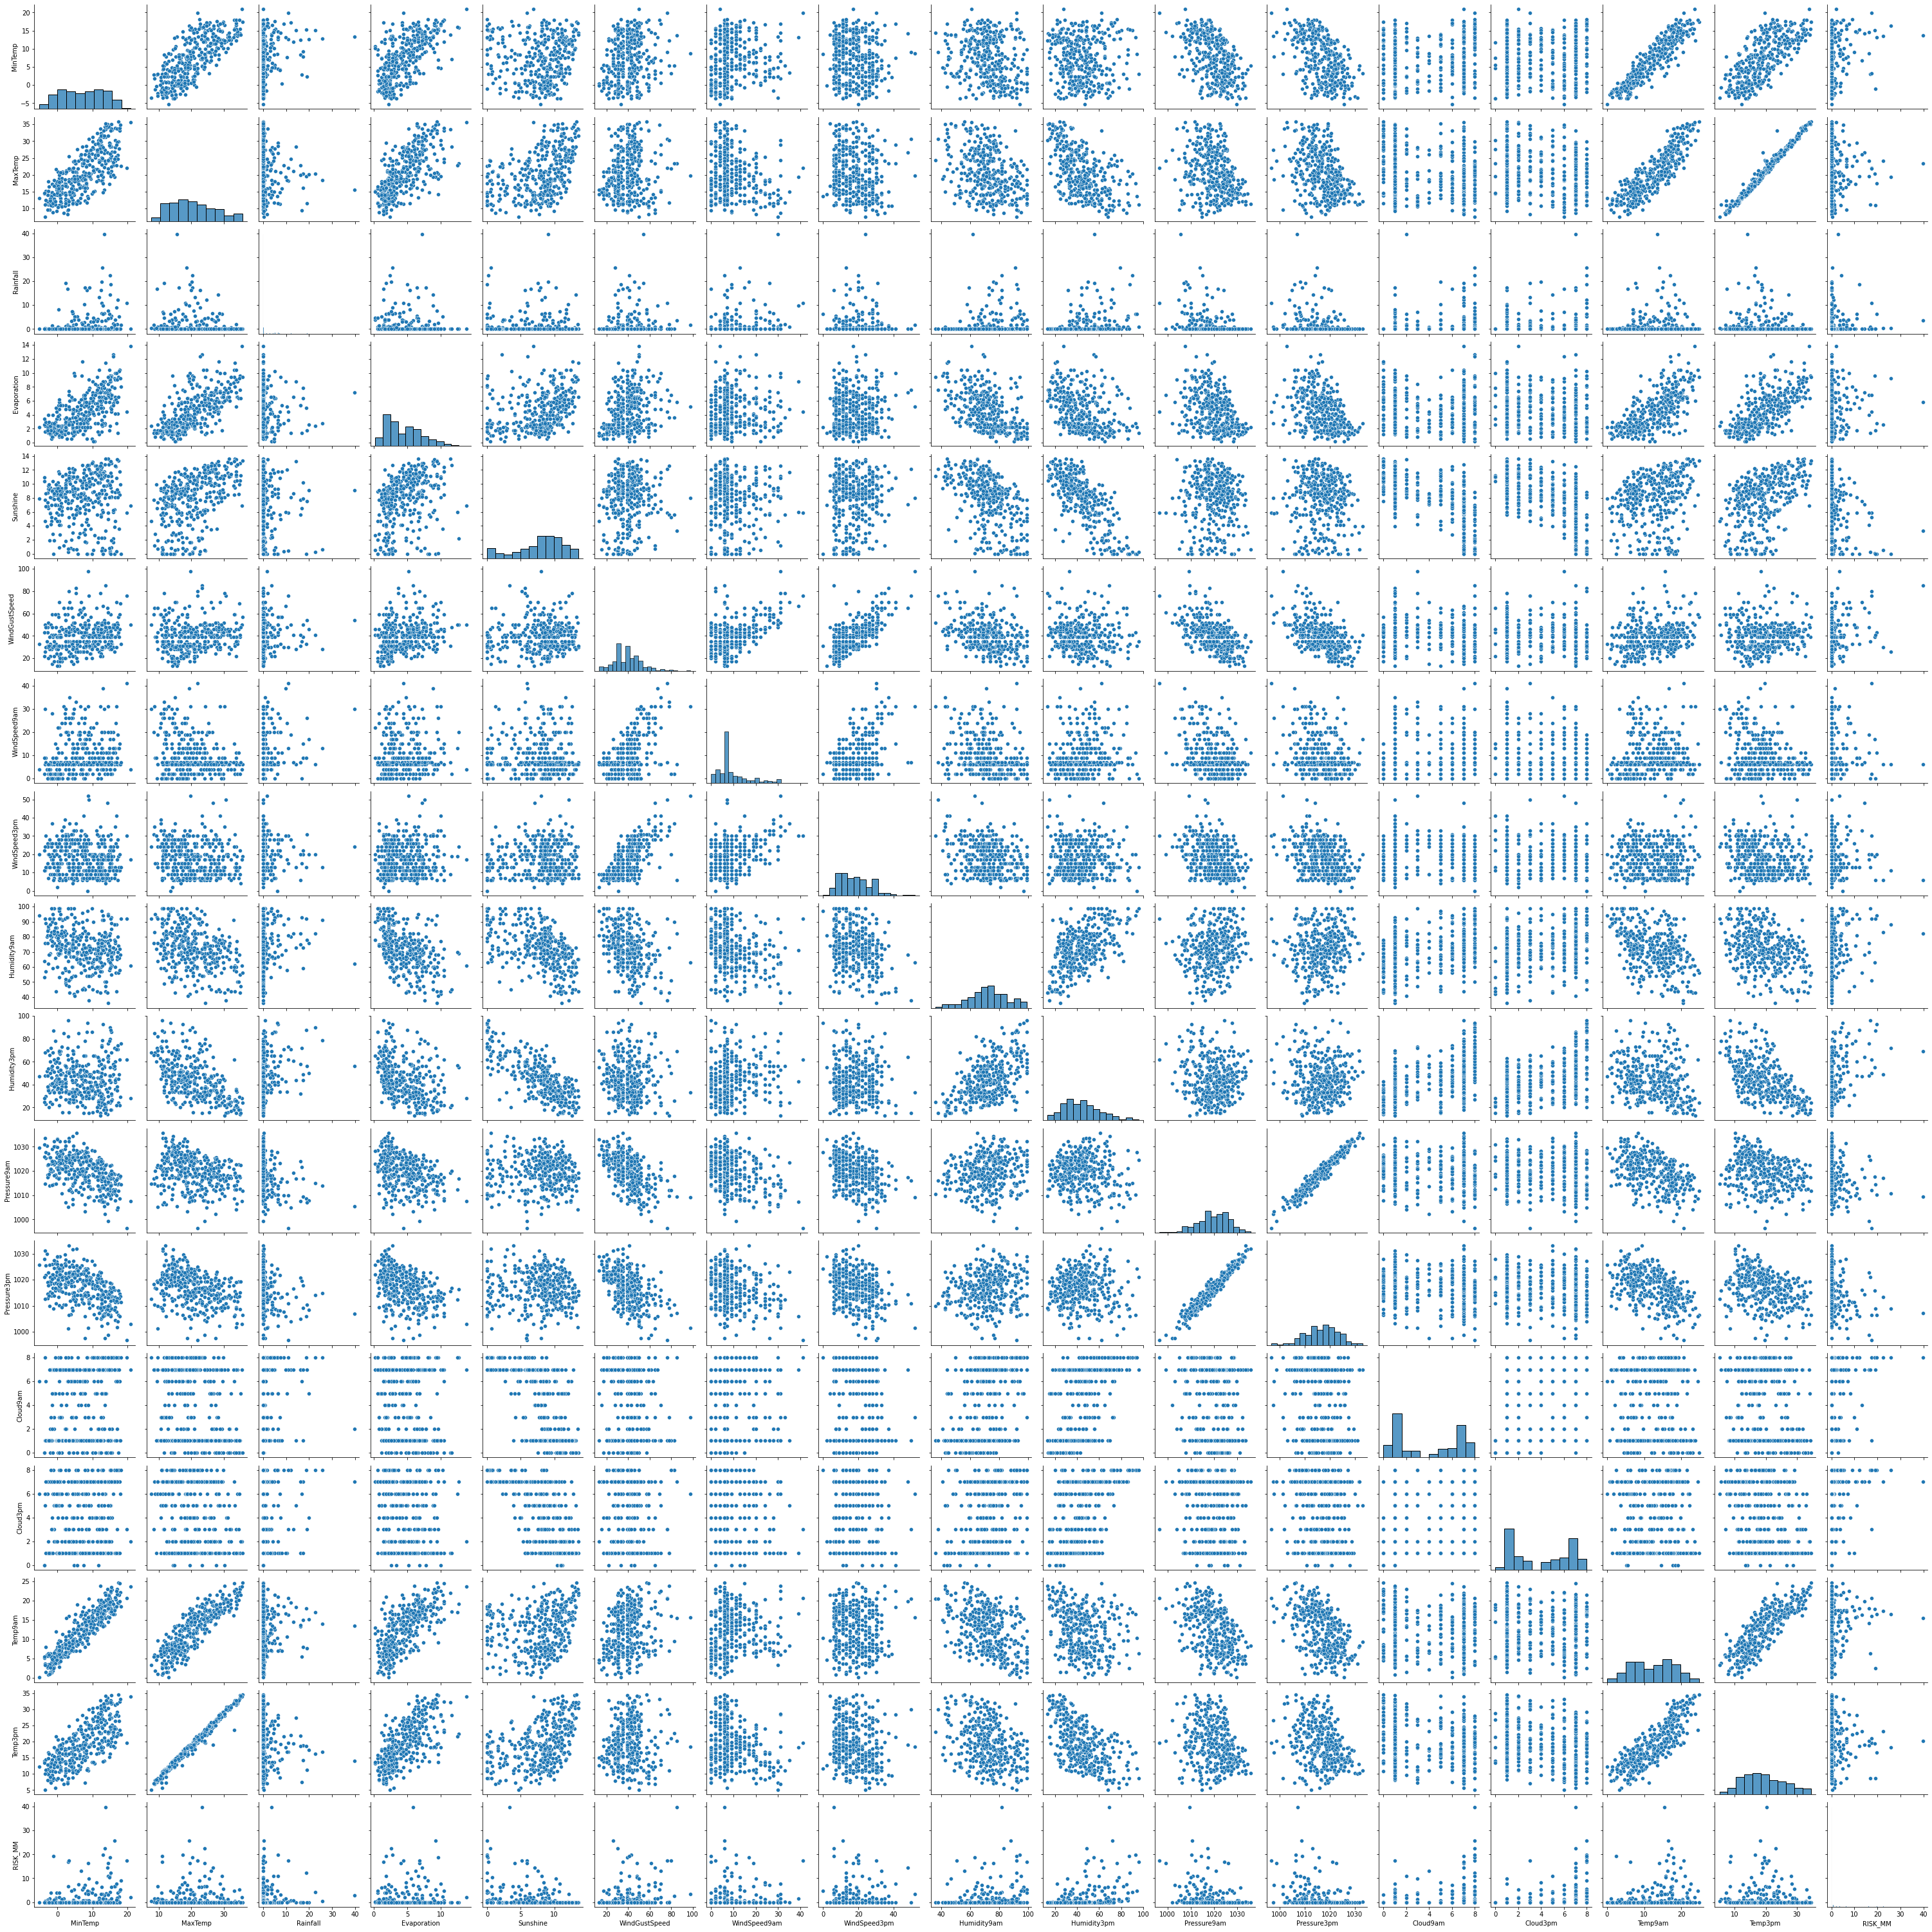

In [26]:
sns.pairplot(df)


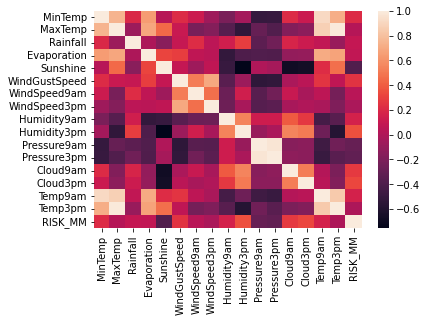

In [27]:
sns.heatmap(df.corr())

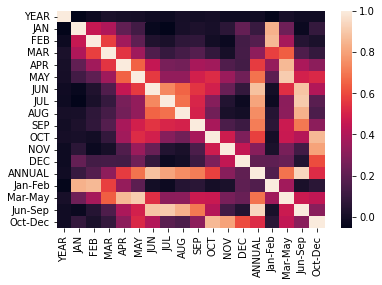

In [28]:
sns.heatmap(dfa.corr())

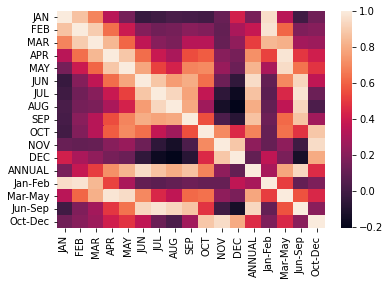

In [29]:
sns.heatmap(dfb.corr())

In [30]:
#Split the dataset into ipdendent and dependent variables.
# independent variable
X = dfa.iloc[:,0:2]
X.head(10)

,SUBDIVISION,YEAR
0,ANDAMAN & NICOBAR ISLANDS,1901
1,ANDAMAN & NICOBAR ISLANDS,1902
2,ANDAMAN & NICOBAR ISLANDS,1903
3,ANDAMAN & NICOBAR ISLANDS,1904
4,ANDAMAN & NICOBAR ISLANDS,1905
5,ANDAMAN & NICOBAR ISLANDS,1906
6,ANDAMAN & NICOBAR ISLANDS,1907
7,ANDAMAN & NICOBAR ISLANDS,1908
8,ANDAMAN & NICOBAR ISLANDS,1910
9,ANDAMAN & NICOBAR ISLANDS,1911


In [31]:
# dependent variable
y = dfa.iloc[:,2:]
y.head(10)

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
5,36.6,0.0,0.0,0.0,556.1,733.3,247.7,320.5,164.3,267.8,128.9,79.2,2534.4,36.6,556.1,1465.8,475.9
6,110.7,0.0,113.3,21.6,616.3,305.2,443.9,377.6,200.4,264.4,648.9,245.6,3347.9,110.7,751.2,1327.1,1158.9
7,20.9,85.1,0.0,29.0,562.0,693.6,481.4,699.9,428.8,170.7,208.1,196.9,3576.4,106.0,591.0,2303.7,575.7
8,26.6,22.7,206.3,89.3,224.5,472.7,264.3,337.4,626.6,208.2,267.3,153.5,2899.4,49.3,520.1,1701.0,629.0
9,0.0,8.4,0.0,122.5,327.3,649.0,253.0,187.1,464.5,333.8,94.5,247.1,2687.2,8.4,449.8,1553.6,675.4


In [32]:
#Check for Categorical columns and perform encoding.
l_en = LabelEncoder()
dfa['SUBDIVISION'] = l_en.fit_transform(dfa['SUBDIVISION'])
dfa.head(10)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,0,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,0,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,0,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,0,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,0,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
5,0,1906,36.6,0.0,0.0,0.0,556.1,733.3,247.7,320.5,164.3,267.8,128.9,79.2,2534.4,36.6,556.1,1465.8,475.9
6,0,1907,110.7,0.0,113.3,21.6,616.3,305.2,443.9,377.6,200.4,264.4,648.9,245.6,3347.9,110.7,751.2,1327.1,1158.9
7,0,1908,20.9,85.1,0.0,29.0,562.0,693.6,481.4,699.9,428.8,170.7,208.1,196.9,3576.4,106.0,591.0,2303.7,575.7
8,0,1910,26.6,22.7,206.3,89.3,224.5,472.7,264.3,337.4,626.6,208.2,267.3,153.5,2899.4,49.3,520.1,1701.0,629.0
9,0,1911,0.0,8.4,0.0,122.5,327.3,649.0,253.0,187.1,464.5,333.8,94.5,247.1,2687.2,8.4,449.8,1553.6,675.4


In [33]:
#FEATURE SCALLING
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler().fit_transform(dfa)
std_scaler

array([[-1.70101042, -1.72673688,  0.9013292 , ...,  2.01173347,
         0.89413409,  4.95762135],
       [-1.70101042, -1.69655901, -0.56437887, ...,  1.50454316,
         1.58678166,  3.37622392],
       [-1.70101042, -1.66638115, -0.18603553, ...,  0.39966389,
         1.14553008,  3.21964398],
       ...,
       [ 0.03932239,  1.65318383,  0.21614047, ..., -0.12244378,
        -0.01029725,  0.14203822],
       [ 0.03932239,  1.6833617 ,  1.02049246, ..., -0.39294528,
        -0.1496473 ,  0.81935146],
       [ 0.03932239,  1.71353956, -0.49883908, ...,  0.33899995,
        -0.28772411,  2.40854788]])

In [34]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dfa)
scaled_data[1:1]

array([], shape=(0, 19), dtype=float64)